In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Phase 1  - Exploratory Data Analysis(EDA)

In [49]:
df = pd.read_csv('data/Titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Step 1: Variable Identification

In [50]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [51]:
df.drop(['PassengerId','Name'],axis=1,inplace=True)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,female,35.0,1,0,113803,53.1000,C123,S
4,0,3,male,35.0,0,0,373450,8.0500,NaN,S


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Ticket      891 non-null object
Fare        891 non-null float64
Cabin       204 non-null object
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(4)
memory usage: 69.7+ KB


In [53]:
df.describe(include='all')

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,male,NaN,NaN,NaN,1601,NaN,G6,S
freq,NaN,NaN,577,NaN,NaN,NaN,7,NaN,4,644
mean,0.383838,2.308642,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,0.486592,0.836071,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,0.000000,1.000000,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,0.000000,2.000000,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,0.000000,3.000000,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,1.000000,3.000000,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


## Step 2: Univariate Analysis

In [54]:
df.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare',
       'Cabin', 'Embarked'],
      dtype='object')

In [55]:
df.dtypes

Survived      int64
Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Cabin        object
Embarked     object
dtype: object

In [56]:
df['Survived'].unique()

array([0, 1], dtype=int64)

In [57]:
df['Survived']=df['Survived'].astype(np.object)
df['Survived']

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: object

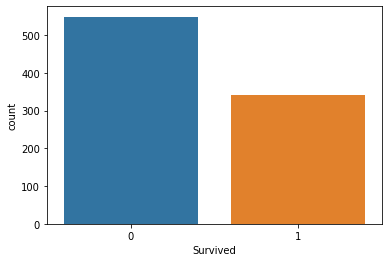

In [58]:
sns.countplot(df['Survived'])

In [59]:
df['Pclass'].unique()

array([3, 1, 2], dtype=int64)

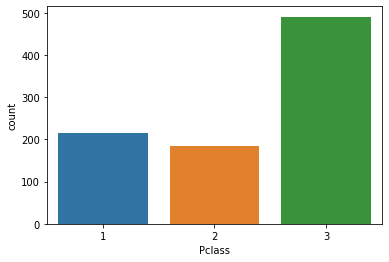

In [60]:
sns.countplot(df['Pclass'])

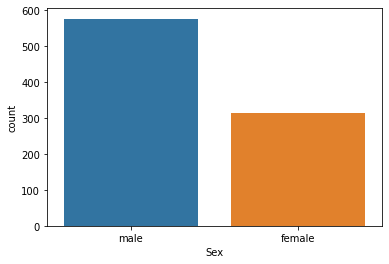

In [61]:
sns.countplot(df['Sex'])

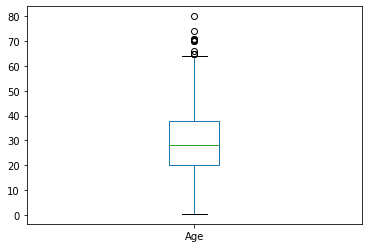

In [95]:
df['Age'].plot(kind='box')

**Detected Outlier Values. Will be Taken Care in Step 5**

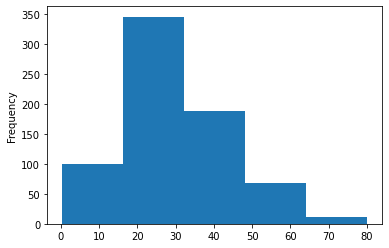

In [114]:
df['Age'].plot(kind='hist',bins=5)

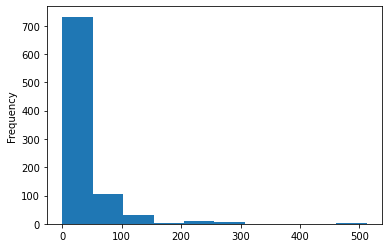

In [118]:
df['Fare'].plot(kind='hist',bins=10)

In [62]:
df['SibSp'].unique()

array([1, 0, 3, 4, 2, 5, 8], dtype=int64)

In [63]:
df.rename(columns={'SibSp':'Siblings','Parch':'Parents'},inplace=True)
df

,Survived,Pclass,Sex,Age,Siblings,Parents,Ticket,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,female,35.0,1,0,113803,53.1000,C123,S
4,0,3,male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,211536,13.0000,NaN,S
887,1,1,female,19.0,0,0,112053,30.0000,B42,S
888,0,3,female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,1,1,male,26.0,0,0,111369,30.0000,C148,C


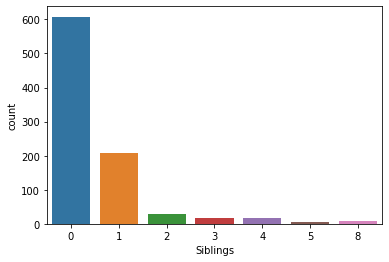

In [64]:
sns.countplot(df['Siblings'])

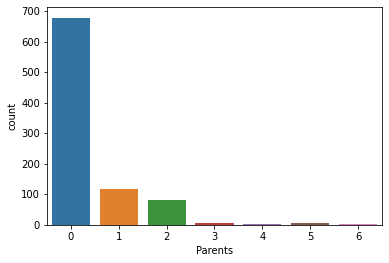

In [65]:
sns.countplot(df['Parents'])

In [66]:
len(df['Ticket'].unique())

681

**Ticket Numbers can be Ignored as it has several classes which is'nt suitable as a feature of the model**

In [81]:
df.drop('Ticket',axis=1,inplace=True)
df.head()

,Survived,Pclass,Sex,Age,Siblings,Parents,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S


In [78]:
df['Fare'].dtypes

dtype('float64')

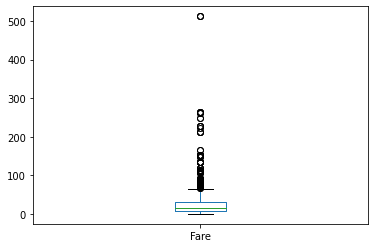

In [82]:
df['Fare'].plot(kind='box')

**So Many Outliers in the Fare Data. We take care of them in Step 5**

In [89]:
df['Cabin'].value_counts()

G6             4
C23 C25 C27    4
B96 B98        4
E101           3
C22 C26        3
              ..
A36            1
D56            1
A20            1
D46            1
C32            1
Name: Cabin, Length: 147, dtype: int64

In [90]:
df['Cabin'].isnull().sum()

687

**So many Missing Values.Will be Removed in Step 4**

In [91]:
df['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

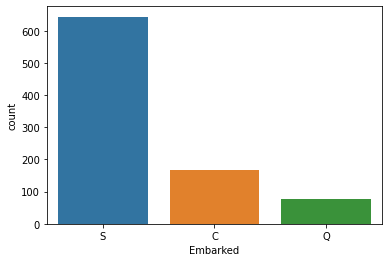

In [94]:
sns.countplot(df['Embarked'])

## Step 3: BiVariate Analysis

In [96]:
df.head()

,Survived,Pclass,Sex,Age,Siblings,Parents,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S


In [97]:
df.dtypes

Survived     object
Pclass        int64
Sex          object
Age         float64
Siblings      int64
Parents       int64
Fare        float64
Cabin        object
Embarked     object
dtype: object

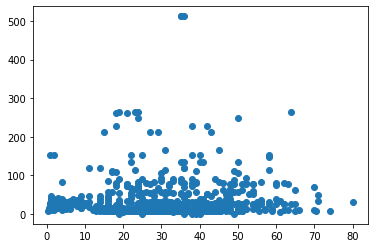

In [98]:
plt.scatter(df['Age'],df['Fare'])

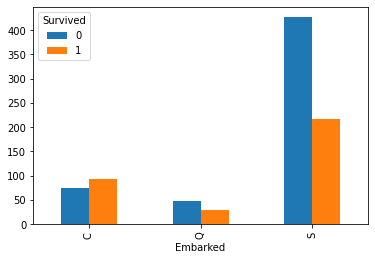

In [167]:
pd.crosstab(df['Embarked'],df['Survived']).plot(kind='bar',stacked=False)

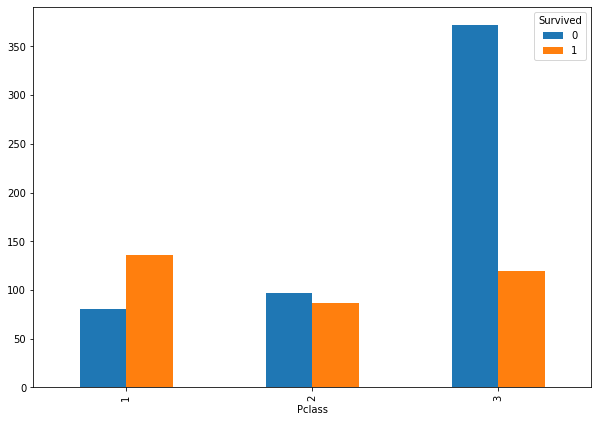

In [107]:
pd.crosstab(df['Pclass'],df['Survived']).plot(kind='bar',figsize=(10,7),stacked=False)

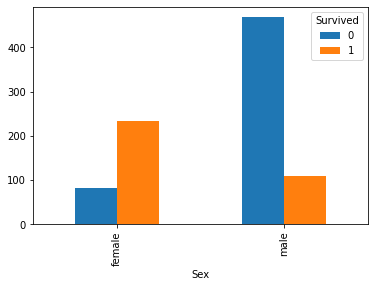

In [109]:
pd.crosstab(df['Sex'],df['Survived']).plot(kind='bar')

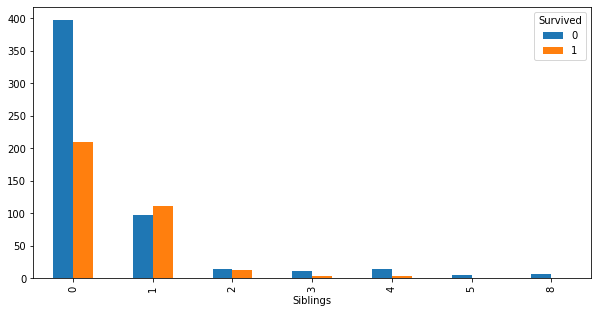

In [121]:
pd.crosstab(df['Siblings'],df['Survived']).plot(kind='bar',figsize=(10,5))

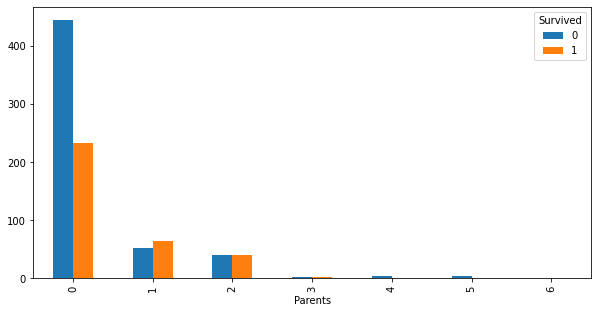

In [122]:
pd.crosstab(df['Parents'],df['Survived']).plot(kind='bar',figsize=(10,5))

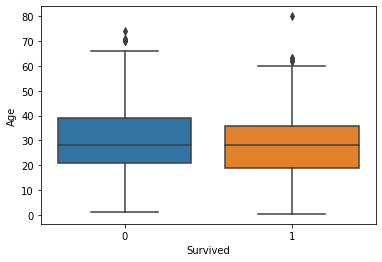

In [126]:
sns.boxplot(y='Age',x='Survived',data=df)

(0.0, 300.0)

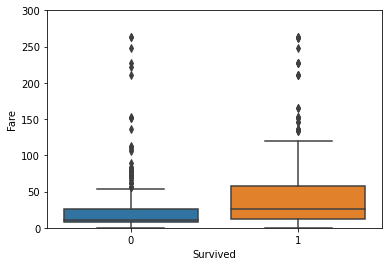

In [132]:
ax=sns.boxplot(x='Survived',y='Fare',data=df)
ax.set_ylim(0,300)

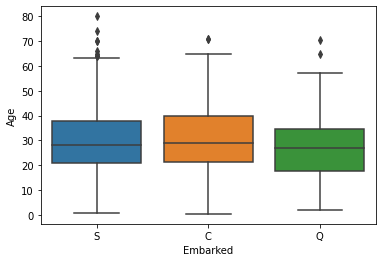

In [135]:
sns.boxplot(x='Embarked',y='Age',data=df)

## Step 4: Missing Values

In [136]:
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
Siblings      0
Parents       0
Fare          0
Cabin       687
Embarked      2
dtype: int64

#### We simply drop Cabin Column

In [139]:
df.drop('Cabin',axis=1,inplace=True)
df.head()

,Survived,Pclass,Sex,Age,Siblings,Parents,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


### For Deciding Fill Value we perform certain operations

In [166]:
df[df['Embarked'].isnull()]

,Survived,Pclass,Sex,Age,Siblings,Parents,Fare,Embarked
61,1,1,female,38.0,0,0,80.0,NaN
829,1,1,female,62.0,0,0,80.0,NaN


### Performing Binning to know relation between Gender and Embarked 

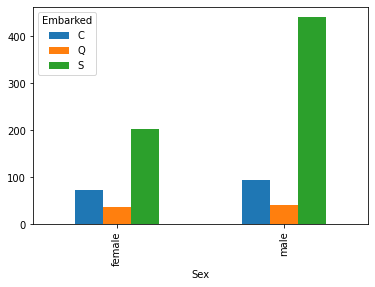

In [169]:
pd.crosstab(df['Sex'],df['Embarked']).plot(kind='bar')

**We Find most of them belong to Embarked Class S. So we fill Null Values of Embarked Column with S**

In [170]:
df['Embarked'].fillna('S',inplace=True)

In [171]:
df['Embarked'].isnull().sum()

0

In [173]:
round(df['Age'].isnull().sum()/891 *100,4)

19.8653

### Almost 19% of the Age data are Null Values. So we can specify a fill value

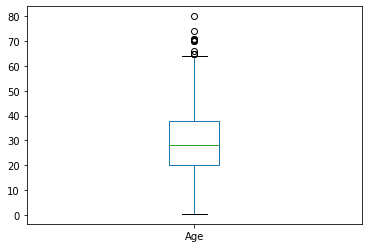

In [175]:
df['Age'].plot(kind='box')

**As we observe that there are large no of outliers that effect the Age. So we use Median Value**

In [176]:
df['Age'].median()

28.0

In [177]:
df['Age'].fillna(df['Age'].median(),inplace=True)
df['Age'].isnull().sum()

0

In [178]:
df.isnull().sum().values

array([0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

## Step 5. Outliers

(0.0, 100.0)

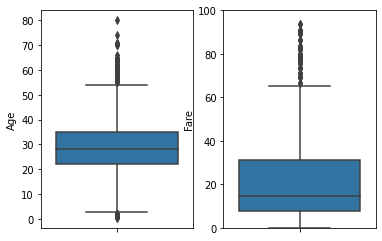

In [182]:
plt.subplot(1,2,1)
sns.boxplot(y='Age',data=df)
plt.subplot(1,2,2)
sns.boxplot(y='Fare',data=df)
plt.ylim(0,100)

In [186]:
IQR = df['Fare'].quantile(0.75)-df['Fare'].quantile(0.25)
UpperLimit = df['Fare'].quantile(0.75)+1.5*IQR
LowerLimit = df['Fare'].quantile(0.25)-1.5*IQR
UpperLimit,LowerLimit

(65.6344, -26.724)

In [197]:
outliers=df[(df['Fare']>=UpperLimit)|(df['Fare']<=LowerLimit)]
outliers

,Survived,Pclass,Sex,Age,Siblings,Parents,Fare,Embarked
1,1,1,female,38.0,1,0,112.079150,C
27,0,1,male,19.0,3,2,112.677075,S
31,1,1,female,28.0,1,0,112.378113,C
34,0,1,male,28.0,1,0,112.228631,C
52,1,1,female,49.0,1,0,112.303372,C
...,...,...,...,...,...,...,...,...
846,0,3,male,28.0,8,2,112.372262,S
849,1,1,female,28.0,1,0,112.372262,C
856,1,1,female,45.0,1,1,112.372262,S
863,0,3,female,28.0,8,2,112.372262,S


In [190]:
indexes=list(outliers.index)
print(indexes)

[1, 27, 31, 34, 52, 61, 62, 72, 88, 102, 118, 120, 124, 139, 151, 159, 180, 195, 201, 215, 218, 224, 230, 245, 256, 257, 258, 262, 268, 269, 275, 290, 291, 297, 299, 305, 306, 307, 310, 311, 318, 319, 324, 325, 332, 334, 336, 337, 341, 366, 369, 373, 375, 377, 380, 385, 390, 393, 412, 435, 438, 445, 453, 484, 486, 496, 498, 504, 505, 520, 527, 537, 540, 544, 550, 557, 558, 581, 585, 587, 591, 609, 627, 641, 645, 655, 659, 660, 665, 679, 681, 689, 698, 700, 708, 716, 730, 737, 741, 742, 745, 759, 763, 765, 779, 789, 792, 802, 820, 829, 835, 846, 849, 856, 863, 879]


**We now replace outliers with 95 percentile value**

In [200]:
for index in indexes:
    df['Fare'][index]=df['Fare'].quantile(0.75)

C:\Users\Ravi\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


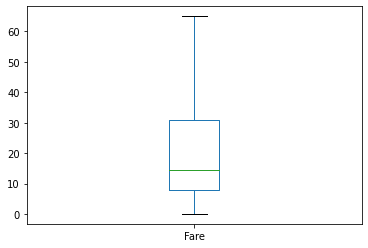

In [202]:
df['Fare'].plot(kind='box')

In [220]:
IQR = df['Age'].quantile(0.75)-df['Age'].quantile(0.25)
UpperLimit=df['Age'].quantile(0.75)+1.5*IQR
LowerLimit=df['Age'].quantile(0.25)-1.5*IQR
UpperLimit,LowerLimit

(54.375, 5.375)

In [221]:
age_outliers = df[(df['Age']>=UpperLimit)|(df['Age']<=LowerLimit)]

In [222]:
indexes=list(age_outliers.index)
print(indexes)

[10, 43, 58, 63, 171, 184, 193, 233, 261, 348, 374, 407, 445, 448, 618, 691, 750, 777, 850, 869]


In [223]:
for index in indexes:
    df['Age'][index]=df['Age'].quantile(0.25)

C:\Users\Ravi\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


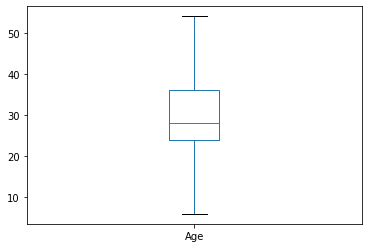

In [224]:
df['Age'].plot(kind='box')

## Step 6:  Feature Engineering

In [226]:
df.dtypes==np.object

Survived     True
Pclass      False
Sex          True
Age         False
Siblings    False
Parents     False
Fare        False
Embarked     True
dtype: bool

In [227]:
gender = pd.get_dummies(df['Sex'],drop_first=True)
gender

,male
0,1
1,0
2,0
3,0
4,1
...,...
886,1
887,0
888,0
889,1


In [228]:
df=pd.concat([df,gender],axis=1)
df

,Survived,Pclass,Sex,Age,Siblings,Parents,Fare,Embarked,male
0,0,3,male,22.0,1,0,7.250,S,1
1,1,1,female,38.0,1,0,31.000,C,0
2,1,3,female,26.0,0,0,7.925,S,0
3,1,1,female,35.0,1,0,53.100,S,0
4,0,3,male,35.0,0,0,8.050,S,1
...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.000,S,1
887,1,1,female,19.0,0,0,30.000,S,0
888,0,3,female,28.0,1,2,23.450,S,0
889,1,1,male,26.0,0,0,30.000,C,1


In [230]:
df.drop('Sex',axis=1,inplace=True)
df.head()

,Survived,Pclass,Age,Siblings,Parents,Fare,Embarked,male
0,0,3,22.0,1,0,7.250,S,1
1,1,1,38.0,1,0,31.000,C,0
2,1,3,26.0,0,0,7.925,S,0
3,1,1,35.0,1,0,53.100,S,0
4,0,3,35.0,0,0,8.050,S,1


In [232]:
dummy=pd.get_dummies(df['Embarked'],drop_first=True)
dummy

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1
...,...,...
886,0,1
887,0,1
888,0,1
889,0,0


In [233]:
df=pd.concat([df,dummy],axis=1)
df.head()

,Survived,Pclass,Age,Siblings,Parents,Fare,Embarked,male,Q,S
0,0,3,22.0,1,0,7.250,S,1,0,1
1,1,1,38.0,1,0,31.000,C,0,0,0
2,1,3,26.0,0,0,7.925,S,0,0,1
3,1,1,35.0,1,0,53.100,S,0,0,1
4,0,3,35.0,0,0,8.050,S,1,0,1


In [235]:
df.drop('Embarked',axis=1,inplace=True)
df.head()

,Survived,Pclass,Age,Siblings,Parents,Fare,male,Q,S
0,0,3,22.0,1,0,7.250,1,0,1
1,1,1,38.0,1,0,31.000,0,0,0
2,1,3,26.0,0,0,7.925,0,0,1
3,1,1,35.0,1,0,53.100,0,0,1
4,0,3,35.0,0,0,8.050,1,0,1


In [278]:
df['male']=df['male'].astype(np.int64)
df['male'].unique()

array([1, 0], dtype=int64)

In [277]:
df['S']=df['S'].astype(np.int64)
df['S'].unique()

array([1, 0], dtype=int64)

In [276]:
df['Q']=df['Q'].astype(np.int64)
df['Q'].unique()

array([0, 1], dtype=int64)

## 7. Feature Engineering(Variable Transformation-Standardization)

In [236]:
df['Age'] = (df['Age']-df['Age'].mean())/(df['Age'].std())
df.head()

,Survived,Pclass,Age,Siblings,Parents,Fare,male,Q,S
0,0,3,-0.811817,1,0,7.250,1,0,1
1,1,1,0.732830,1,0,31.000,0,0,0
2,1,3,-0.425656,0,0,7.925,0,0,1
3,1,1,0.443208,1,0,53.100,0,0,1
4,0,3,0.443208,0,0,8.050,1,0,1


In [237]:
df['Fare']=(df['Fare']-df['Fare'].mean())/df['Fare'].std()
df.head()

,Survived,Pclass,Age,Siblings,Parents,Fare,male,Q,S
0,0,3,-0.811817,1,0,-0.915817,1,0,1
1,1,1,0.732830,1,0,0.854294,0,0,0
2,1,3,-0.425656,0,0,-0.865509,0,0,1
3,1,1,0.443208,1,0,2.501430,0,0,1
4,0,3,0.443208,0,0,-0.856192,1,0,1


In [292]:
df['Survived']=df['Survived'].astype('int')

In [293]:
df.to_csv('Titanic_Cleaned.csv')

# Creating an ML Model

### Creating Variables X and Y

In [294]:
X = df[['Age','male','S','Q','Parents','Siblings','Pclass','Fare']].values
Y = df[['Survived']].values


### Splitting Data into Train and Test set

In [295]:
from sklearn.model_selection import train_test_split

In [296]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=0)


In [297]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(712, 8)
(179, 8)
(712, 1)
(179, 1)


In [298]:
df.dtypes

Survived      int32
Pclass        int64
Age         float64
Siblings      int64
Parents       int64
Fare        float64
male          int64
Q             int64
S             int64
dtype: object

### Training the Model

In [340]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
import warnings
from sklearn.metrics import confusion_matrix,accuracy_score

In [341]:
warnings.filterwarnings('ignore')

### Logistic Regression

In [345]:
classifier = LogisticRegression()
classifier.fit(X_train,Y_train)
Y_pred=classifier.predict(X_test)
print(accuracy_score(Y_pred,Y_test))

0.7877094972067039


## Decision Tree

In [381]:
classifier = DecisionTreeClassifier(random_state=0)
classifier.fit(X_train,Y_train)
Y_pred=classifier.predict(X_test)
print(accuracy_score(Y_pred,Y_test))

0.7821229050279329


## KNN Classifier

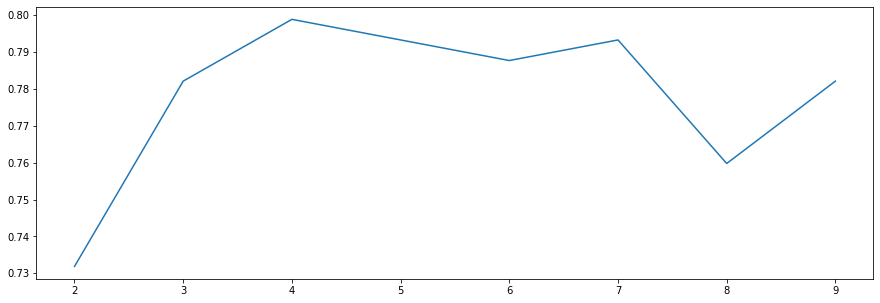

In [384]:
accuracies=[]
for i in range(2,10):
    classifier = KNeighborsClassifier(n_neighbors=i)
    classifier.fit(X_train,Y_train)
    Y_pred = classifier.predict(X_test)
    accuracies.append(accuracy_score(Y_pred,Y_test))
accuracies=np.array(accuracies)
plt.figure(figsize=(15,5))
plt.plot(list(range(2,10)),accuracies)
plt.show()

In [388]:
max_accuracy=np.max(accuracies)
index_value=np.argmax(accuracies)
print(index_value,max_accuracy,accuracies[index_value])

2 0.7988826815642458 0.7988826815642458


In [391]:
classifier=KNeighborsClassifier(n_neighbors=4)
classifier.fit(X_train,Y_train)
Y_pred=classifier.predict(X_test)
print(accuracy_score(Y_pred,Y_test))

0.7988826815642458


## Random Forest

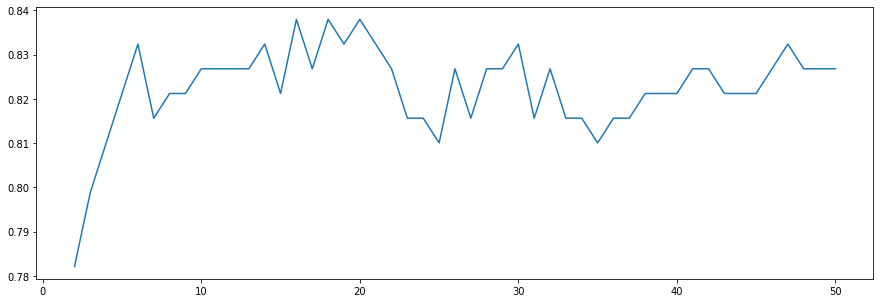

In [392]:
accuracies=[]
for i in range(2,51):
    classifier = RandomForestClassifier(n_estimators=i,random_state=0)
    classifier.fit(X_train,Y_train)
    Y_pred = classifier.predict(X_test)
    accuracies.append(accuracy_score(Y_pred,Y_test))
accuracies=np.array(accuracies)
plt.figure(figsize=(15,5))
plt.plot(list(range(2,51)),accuracies)
plt.show()

In [397]:
classifier=RandomForestClassifier(n_estimators=max_index,random_state=0)
classifier.fit(X_train,Y_train)
Y_pred=classifier.predict(X_test)
print(accuracy_score(Y_pred,Y_test))
print(accuracy_score(Y_train,classifier.predict(X_train)))

0.8379888268156425
0.9691011235955056
